# Example Notebook

This notebook is designed demonstrate a number of goals:

  - The notebook is part of the automated analytical pipeline, as it is run programmatically by the build system, as in the dodo.py file.
  - It is tracked by version control via Git. To avoid large files and the problems associated with non-text files, the notebook is stripped of its output. 
  - In order to avoid re-running the notebook every time it changes (it changes often, even by the act of opening it) and to only rerun it if meaningful changes have been made, the build system only looks for changes in the plaintext version of the notebook. That is, the notebook is converted to a Python script via [nbconvert](https://nbconvert.readthedocs.io/en/latest/), which is often packaged with Jupyter.
  Then, DoIt looks for changes to the Python version. If it detects a difference, then the notebook is re-run. (Note, that you could also convert to a Markdown file with 
  [JupyText](https://github.com/mwouts/jupytext). However, this package is often not packaged with Jupyter.)
  - Since we want to use Jupyter Notebooks for exploratory reports, we want to keep fully-computed versions of the notebook (with the output intact). However, earlier I said that I strip the notebook of its output before committing to version control. Well, to keep the output, every time PyDoit runs the notebook, it outputs an HTML version of the freshly run notebook and saves that HTML report in the `output` directory. That way, you will be able to view the finished report at any time without having to open Jupyter.

In [1]:
import config
from pathlib import Path
OUTPUT_DIR = Path(config.OUTPUT_DIR)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Fama-French Market Monthly/Annual Return

In [3]:
import load_fama_french
fama_french = load_fama_french.pull_CRSP_Fama_French_monthly()
fama_french

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


,date,mktrf,rf
0,1988-01-04,0.0334,0.00015
1,1988-01-05,0.0122,0.00015
2,1988-01-06,0.0027,0.00015
3,1988-01-07,0.0074,0.00015
4,1988-01-08,-0.0566,0.00015
...,...,...,...
8059,2019-12-24,0.0001,0.00007
8060,2019-12-26,0.0048,0.00007
8061,2019-12-27,-0.0010,0.00007
8062,2019-12-30,-0.0057,0.00007


In [4]:
df_mkt = load_fama_french.get_Fama_French_Mkt_Return(fama_french)
df_mkt

/Users/a14542/Desktop/FINM32900/blank_project/src/load_fama_french.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_return'] = np.log1p(df['mkt'])


,date,mkt,log_return
0,1988-01-04,0.03355,0.032999
1,1988-01-05,0.01235,0.012274
2,1988-01-06,0.00285,0.002846
3,1988-01-07,0.00755,0.007522
4,1988-01-08,-0.05645,-0.058106
...,...,...,...
8059,2019-12-24,0.00017,0.000170
8060,2019-12-26,0.00487,0.004858
8061,2019-12-27,-0.00093,-0.000930
8062,2019-12-30,-0.00563,-0.005646


/Users/a14542/Desktop/FINM32900/blank_project/src/load_fama_french.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_return'] = np.log1p(df['mkt'])
/Users/a14542/Desktop/FINM32900/blank_project/src/load_fama_french.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


<Axes: xlabel='date'>

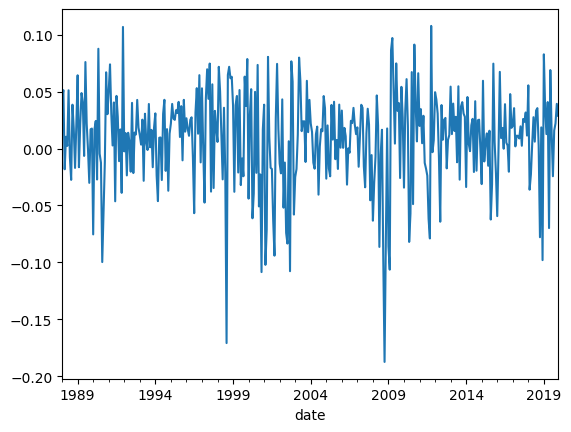

In [5]:
df_mkt = load_fama_french.get_Fama_French_Mkt_Return(fama_french)
mkt_month_ret = load_fama_french.calc_monthly_return(df_mkt)
mkt_month_ret.plot()

In [6]:
df_mkt = load_fama_french.get_Fama_French_Mkt_Return(fama_french)

/Users/a14542/Desktop/FINM32900/blank_project/src/load_fama_french.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_return'] = np.log1p(df['mkt'])


/Users/a14542/Desktop/FINM32900/blank_project/src/load_fama_french.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_return'] = np.log1p(df['mkt'])
/Users/a14542/Desktop/FINM32900/blank_project/src/load_fama_french.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


<Axes: xlabel='date'>

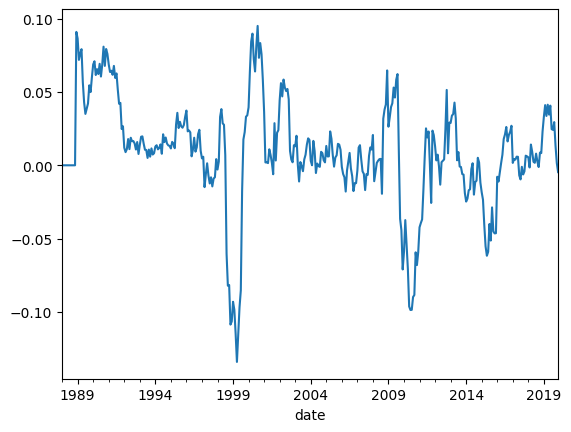

In [16]:
df_mkt = load_fama_french.get_Fama_French_Mkt_Return(fama_french)

mkt_annual_ret = load_fama_french.calc_annual_return(df_mkt)
mkt_annual_ret.plot()

In [13]:
# Use describe with include='all' to get a description of all columns
mkt_annual_ret.describe()

count    384.000000
mean       0.009117
std        0.037081
min       -0.134216
25%       -0.002267
50%        0.008843
75%        0.026563
max        0.095140
Name: annual_log_return, dtype: float64

In [14]:
# Calculate the 1-month lag autocorrelation of the annual market returns
annual_autocorrelation = mkt_annual_ret.autocorr(lag=1)
annual_autocorrelation

0.9265753920800265

In [15]:
monthly_autocorrelation = mkt_month_ret.autocorr(lag=1)
monthly_autocorrelation

0.05036311652195588

# S&P 500 Monthly/Annual Return

#### V1 - S&P500 PX_LAST from Bloomberg

In [21]:
import pandas as pd
df = pd.read_excel('ds_01.xlsx', sheet_name = 'SPX_Index')
df

,Dates,PX_LAST,CUR_MKT_CAP,IDX_EST_DVD_YLD
0,1987-03-31,291.70,NaN,NaN
1,1987-04-30,288.36,NaN,NaN
2,1987-05-29,290.10,NaN,NaN
3,1987-06-30,304.00,NaN,NaN
4,1987-07-31,318.66,NaN,NaN
...,...,...,...,...
438,2023-09-29,4288.05,37458578.33,1.6363
439,2023-10-31,4193.80,36574969.86,1.6759
440,2023-11-30,4567.80,39844220.66,1.5418
441,2023-12-29,4769.83,41737596.22,1.4784


In [35]:
import numpy as np

# Filter the DataFrame for the specified date range
date_mask = (df['Dates'] >= '1988-01-01') & (df['Dates'] <= '2019-12-31')
filtered_df = df.loc[date_mask]

# Calculate log monthly returns based on the PX_LAST column
filtered_df['Log_Monthly_Returns'] = np.log(filtered_df['PX_LAST'] / filtered_df['PX_LAST'].shift(1))
sp500_monthly_ret = filtered_df[['Dates','Log_Monthly_Returns']]
sp500_monthly_ret.set_index('Dates', inplace = True)
sp500_monthly_ret.describe()

/var/folders/5p/s4my2nv1159g3mwckrx1vb500000gn/T/ipykernel_28526/1787979406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log_Monthly_Returns'] = np.log(filtered_df['PX_LAST'] / filtered_df['PX_LAST'].shift(1))


,Log_Monthly_Returns
count,383.000000
mean,0.006609
std,0.040855
min,-0.185636
25%,-0.017331
50%,0.011259
75%,0.032064
max,0.105790


In [36]:
def calc_annual_return(data):
    data['Dates'] = pd.to_datetime(data['Dates'])

    # Set the 'date' as the index
    data.set_index('Dates', inplace=True)

    # Group by year and month, and select the last day
    df_mkt_month_end = data.resample('M').last()

    # Calculate the rolling 12-month sum of log returns
    df_mkt_month_end['annual_log_return'] = df_mkt_month_end['Log_Monthly_Returns'].rolling(window=12).sum()

    # Display the total number of observations and the first few rows to verify the rolling calculation
    mkt_annual_ret = df_mkt_month_end['annual_log_return'].fillna(0)

    return mkt_annual_ret

# Calculate the log annual return
annual_log_return = calc_annual_return(filtered_df)
annual_log_return.describe()

/var/folders/5p/s4my2nv1159g3mwckrx1vb500000gn/T/ipykernel_28526/4005304222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dates'] = pd.to_datetime(data['Dates'])


count    384.000000
mean       0.074794
std        0.154481
min       -0.593415
25%        0.021040
50%        0.100132
75%        0.165937
max        0.407146
Name: annual_log_return, dtype: float64

#### V2 - S&P500 return from WRDS CRSP

In [1]:
import load_sp_return
sp_return = load_sp_return.pull_CRSP_sp_return_monthly('charels_song')
sp_return

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


,caldt,sprtrn,log_return
0,1988-01-29,0.040432,0.039636
1,1988-02-29,0.041817,0.040966
2,1988-03-31,-0.033343,-0.033912
3,1988-04-29,0.009425,0.009381
4,1988-05-31,0.003176,0.003171
...,...,...,...
379,2019-08-30,-0.018092,-0.018258
380,2019-09-30,0.017181,0.017035
381,2019-10-31,0.020432,0.020226
382,2019-11-29,0.034047,0.033480


WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


<Axes: xlabel='caldt'>

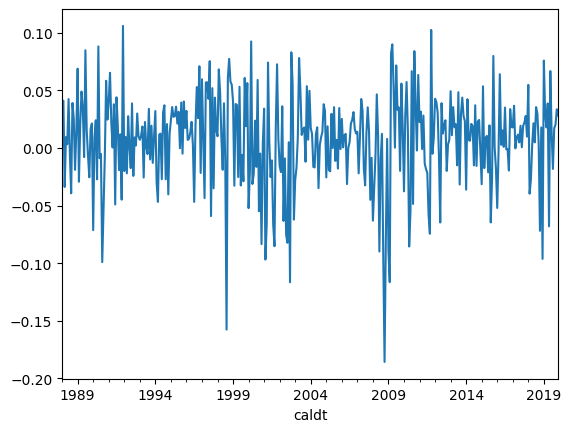

In [8]:
sp_return = load_sp_return.pull_CRSP_sp_return_monthly('charels_song')
sp500_monthly_ret = load_sp_return.calc_monthly_return(sp_return)
sp500_monthly_ret.plot()

In [9]:
sp500_monthly_ret.describe()

count    384.000000
mean       0.006695
std        0.040837
min       -0.185637
25%       -0.017241
50%        0.011362
75%        0.032325
max        0.105790
Name: log_return, dtype: float64

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


<Axes: xlabel='caldt'>

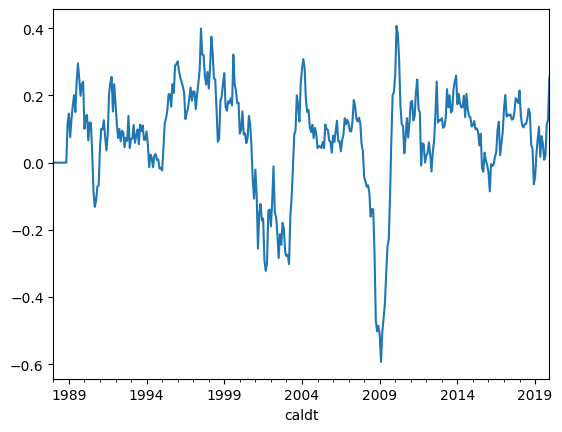

In [6]:
sp_return = load_sp_return.pull_CRSP_sp_return_monthly('charels_song')
sp500_annual_ret = load_sp_return.calc_annual_return(sp_return)
sp500_annual_ret.plot()

In [10]:
sp500_annual_ret.describe()

count    384.000000
mean       0.075098
std        0.154448
min       -0.593414
25%        0.022017
50%        0.100524
75%        0.165931
max        0.407147
Name: annual_log_return, dtype: float64

# Market Duration

In [1]:
import load_compustat
compustat = load_compustat.pull_CRSP_stock_ciz('charles_song')

Loading library list...
Done


In [2]:
compustat.dropna()
compustat

,mthcaldt,permno,ticker,shrout,mthprc
0,1988-01-29,10001,GFGC,992.0,6.2500
1,1988-01-29,10002,MBNC,1175.0,10.3750
2,1988-01-29,10003,GCBK,2194.0,18.7500
3,1988-01-29,10005,WERC,8376.0,0.1563
4,1988-01-29,10007,None,2064.0,NaN
...,...,...,...,...,...
370592,2019-12-31,93426,VPG,12498.0,34.0000
370593,2019-12-31,93427,FN,37003.0,64.8400
370594,2019-12-31,93429,CBOE,110777.0,120.0000
370595,2019-12-31,93434,SANW,33305.0,2.1000


In [35]:
import wrds

# Connect to WRDS
db = wrds.Connection()

# Define the SQL query to obtain S&P 500 constituents' PERMNO and tickers
# This query is hypothetical and may need adjustments based on the actual database schema
sql_query = """
                        select a.*, b.date, b.ret
                        from crsp.msp500list as a,
                        crsp.msf as b
                        where a.permno=b.permno
                        and a.start>= '06/15/1983'
                        and a.ending<='12/31/2019'
                        and b.date >= a.start and b.date<= a.ending
                        order by date;
                        """

db = wrds.Connection(wrds_username='charles_song')
sp500 = db.raw_sql(sql_query, date_cols=['start', 'ending', 'date'])
db.close()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done
Loading library list...
Done


In [37]:
len(sp500['permno'].unique())

509

In [39]:
sp500

,permno,start,ending,date,ret
0,62834,1983-07-07,2006-06-05,1983-07-29,-0.003115
1,62834,1983-07-07,2006-06-05,1983-08-31,-0.012500
2,29962,1983-08-11,1988-04-13,1983-08-31,-0.104938
3,29962,1983-08-11,1988-04-13,1983-09-30,0.156414
4,62834,1983-07-07,2006-06-05,1983-09-30,0.076835
...,...,...,...,...,...
53796,91063,2006-01-03,2019-12-04,2019-11-29,0.116419
53797,85593,2014-07-01,2019-12-20,2019-11-29,0.072734
53798,13168,2011-12-21,2019-12-20,2019-11-29,-0.210396
53799,80399,2013-05-09,2019-12-20,2019-11-29,0.006545


In [46]:
import pandas as pd
sp500_final_df = pd.merge(sp500, compustat, on = ['permno'])
sp500_final_df.drop(['start','ending','date','ret'], axis = 1, inplace = True)
sp500_final_df_truncate = sp500_final_df.head(50000)
sp500_final_df_truncate.to_csv('sp500_truncate.csv')